# Real Time AQ Data

To see realtime air quality data from the WRFT rooftop weather station, please click on the cell below and hit ctrl-enter. 

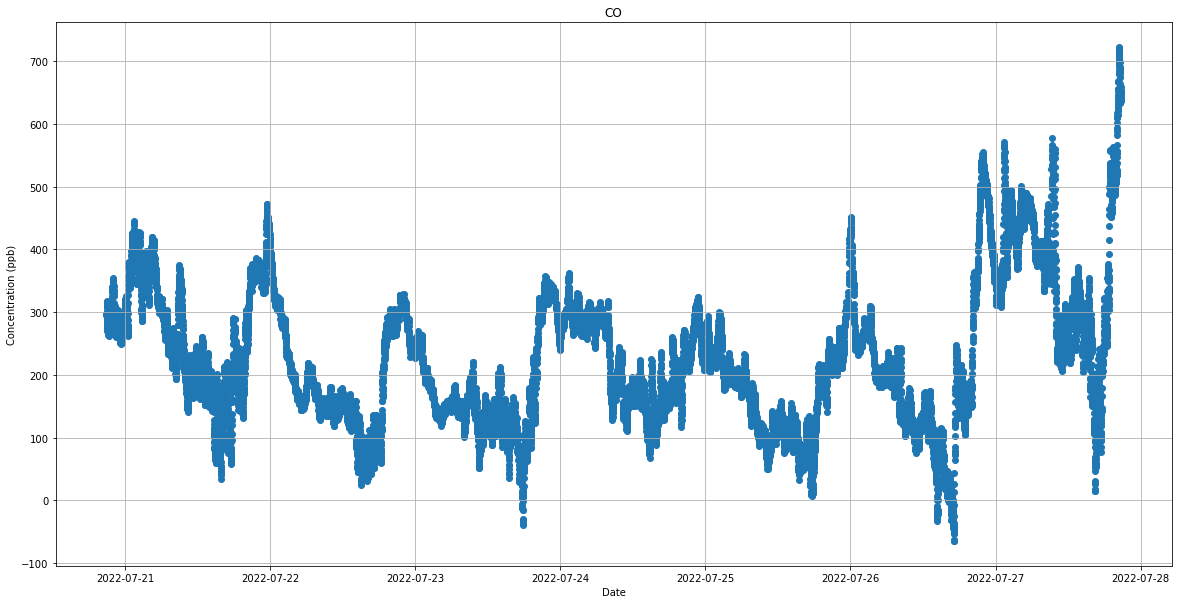

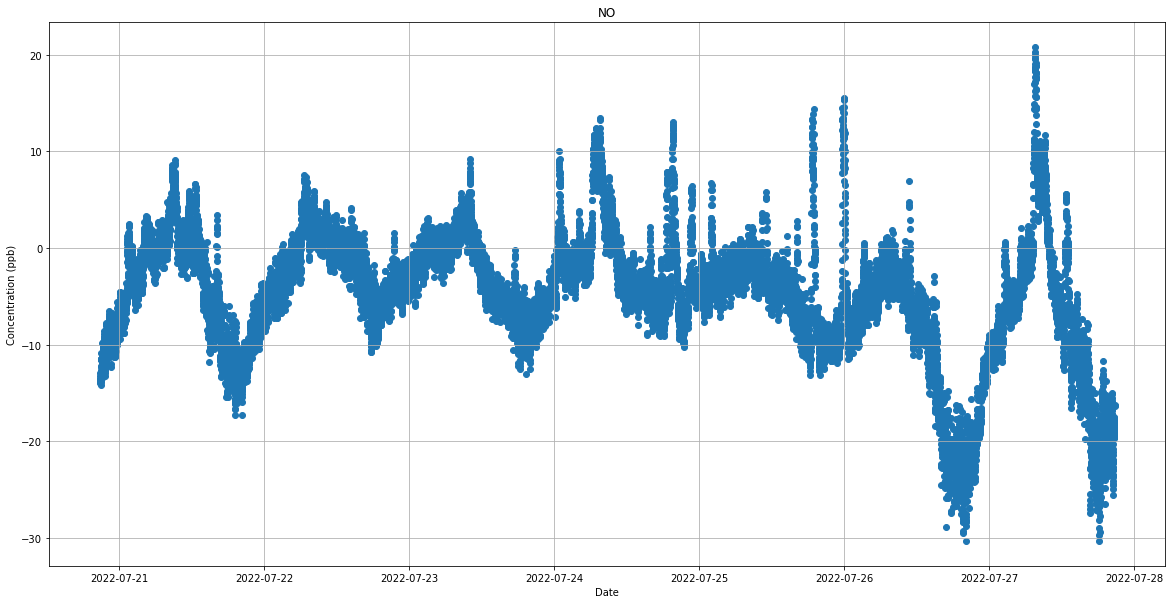

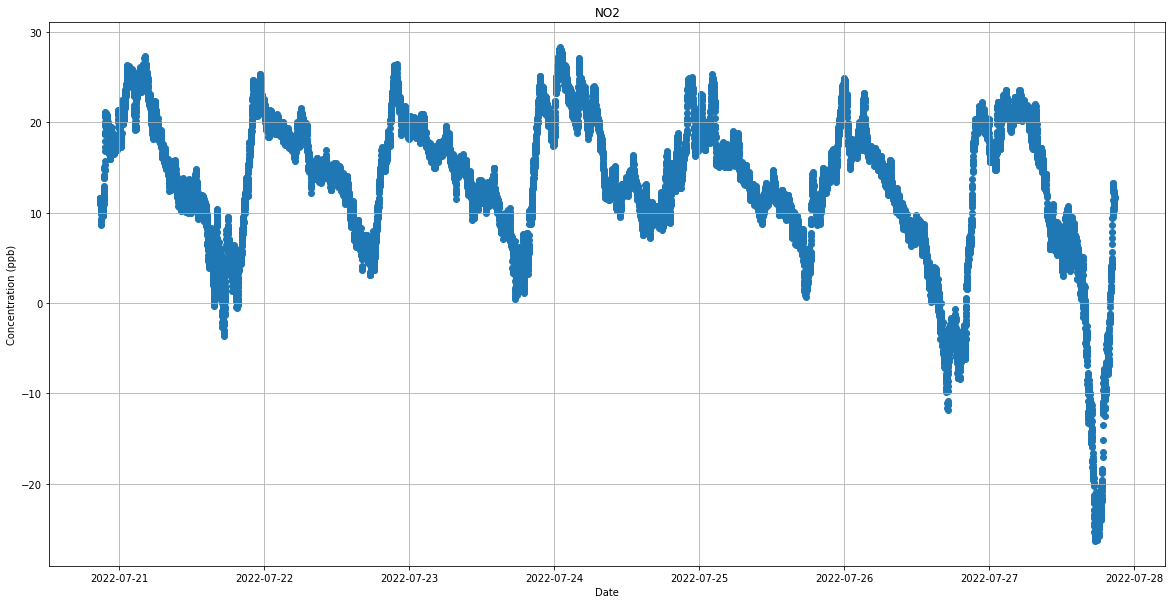

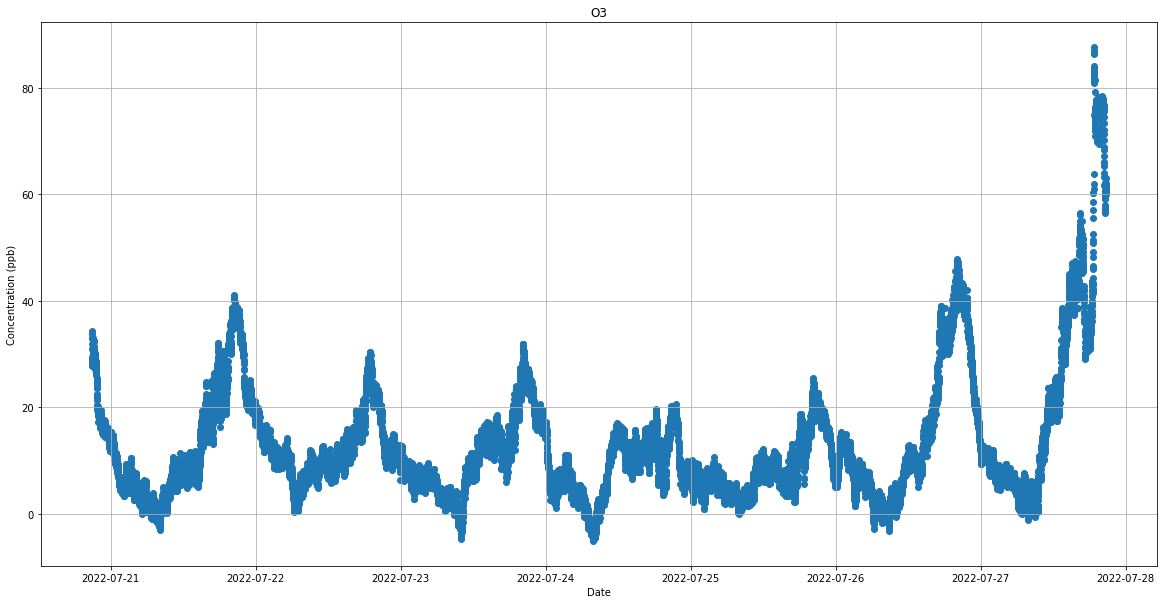

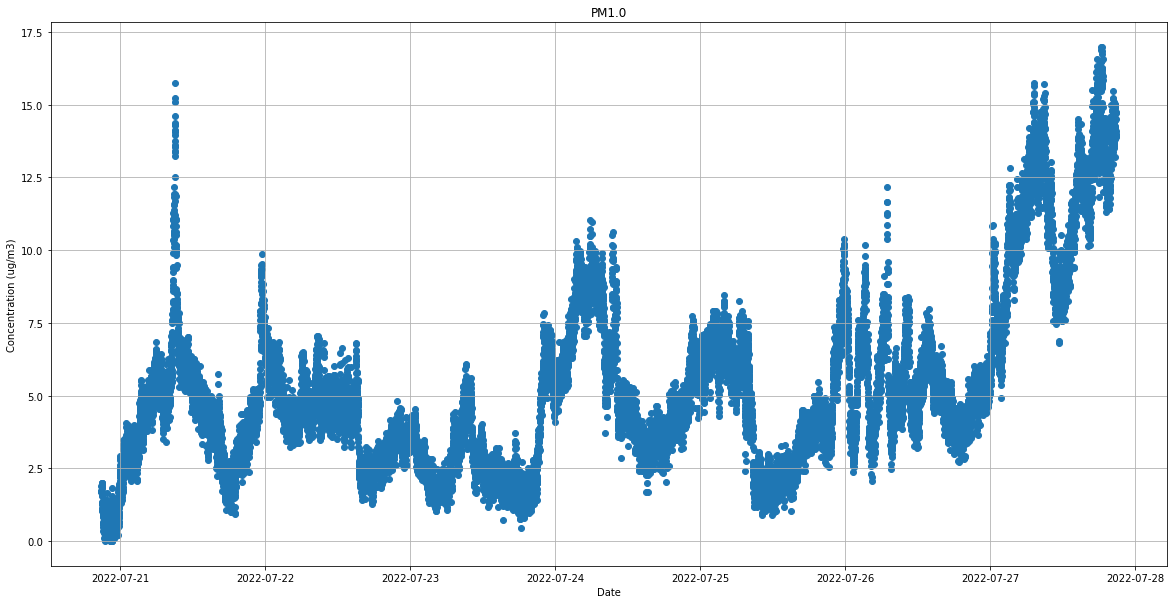

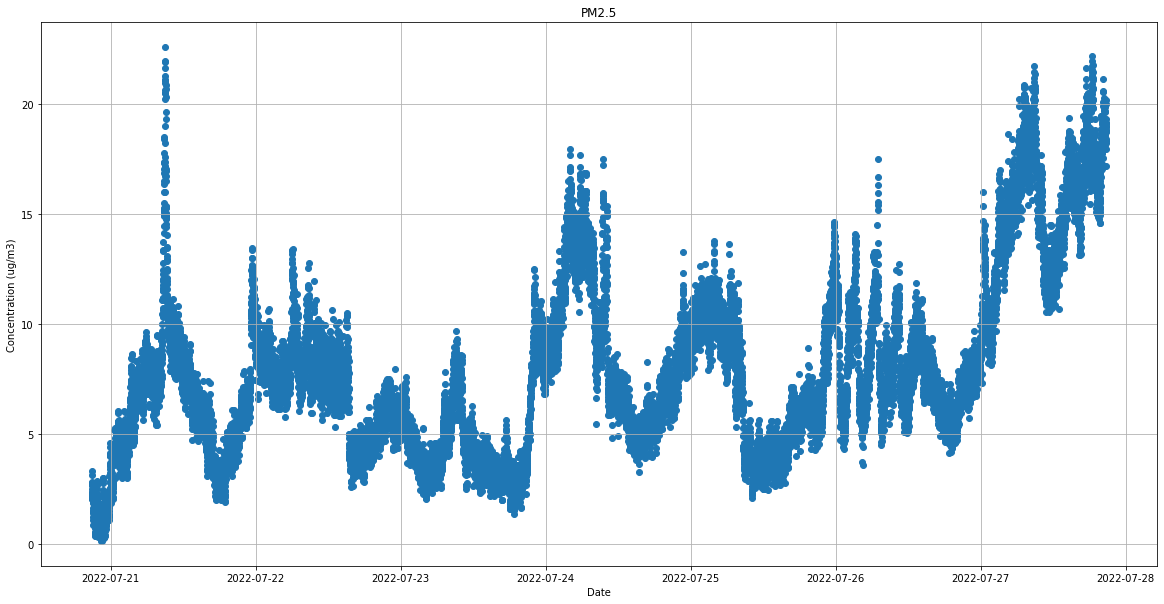

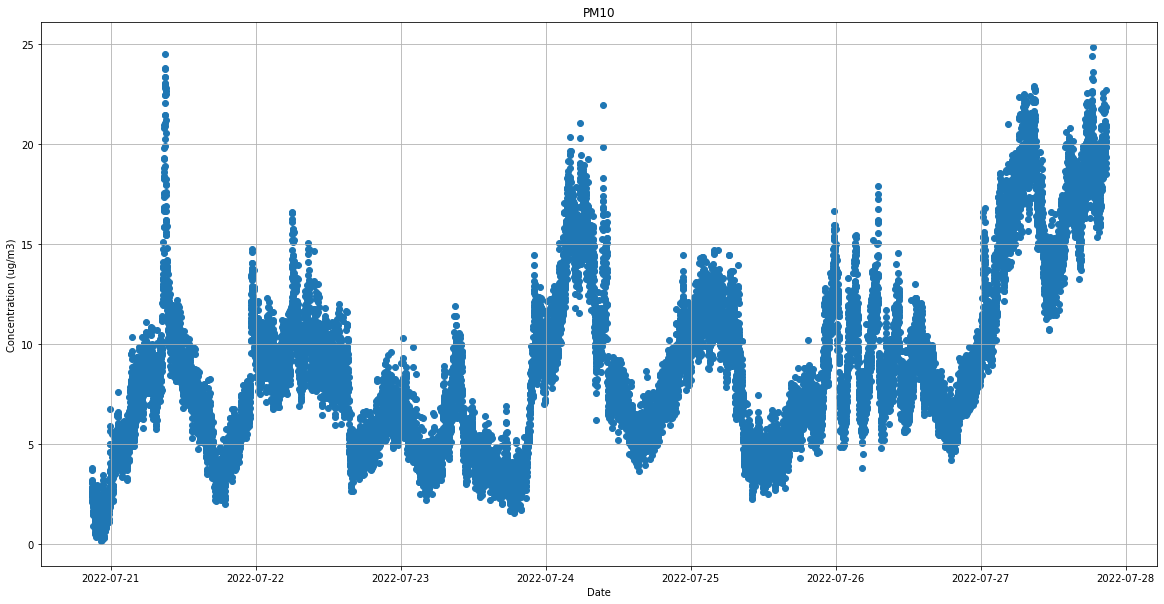

In [28]:
{
    "tags": [
        "hide-cell",
    ]
}

import wget
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os.path
from datetime import date, timedelta

today = date.today()
hist = today - timedelta(days=7)
head = ["Date","CO","NO","NO2", "O3","PM1.0","PM2.5","PM10"]
units = ["ppb","ppb","ppb","ppb","ug/m3","ug/m3","ug/m3"]
week_dat = pd.DataFrame(columns = head)
x = pd.DataFrame()

for i in range(7):
    url =  "http://18.222.146.48/RAMP/v1/raw/1047/data/"+hist.strftime("%Y-%m-%d")+"-1047.txt"
    if os.path.exists(str(hist)+"-1047.txt"): 
        dat = str(hist)+"-1047.txt"
    else:
        dat = wget.download(url)
    dat = pd.read_csv(dat)
    dat.iloc[:,1] = pd.to_datetime(dat.iloc[:,1])

    dat = dat.select_dtypes(exclude=["object"])
    dat = dat.iloc[:,0:12]
    for e in range(4):
        dat = dat.drop(columns=dat.columns[5])

    dat.columns = head
    dat.set_index('Date')

    #dat = dat[(dat>0)]

    week_dat = pd.concat([dat,week_dat], ignore_index=False)
    
    hist = hist + timedelta(days=1)


for r in range(len(head)-1):
    plt.figure(figsize=(20,10))
    plt.scatter(week_dat['Date'],week_dat[str(head[r+1])])
    plt.title(head[r+1])
    plt.ylabel("Concentration ("+str(units[r])+")")
    plt.xlabel("Date")
    plt.grid()
